#### Install requirements, if needed. (Uncomment next cell)

In [1]:
# !pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
raw_data_filepath = './raw_data/shopify_raw_data.xlsx'

# Data was downloaded from 
# https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

In [4]:
# Import into dataframe
data = pd.read_excel(raw_data_filepath)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [5]:
# Q.1: Are there any missing entries?
data.isnull().values.any()

False

In [6]:
# Q.2: Are monetary and items dtype numeric?
data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

#### Data is clean to use! 

In [7]:
# Dont need the first column, reindex using order_id
data.set_index('order_id', inplace=True)
data.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 04:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 04:35:11


##### Now we have a working database. 

### Step 1: Check 'Naive' Average Order Value

It has been reported that the 'Average Order Value (AOV)' is $3145.13. Let us confirm.

In [8]:
round(data.order_amount.mean(),2)

3145.13

In [9]:
round(data.order_amount.median(),2)

284.0

The median value is just $284 while the average far exceeds (11X) the median. **Indicative of outliers in the data**.

### Step 2: Statistics

Lets explore the order_amount visually and draw some reasons why the average value is so high.

<AxesSubplot:xlabel='order_amount'>

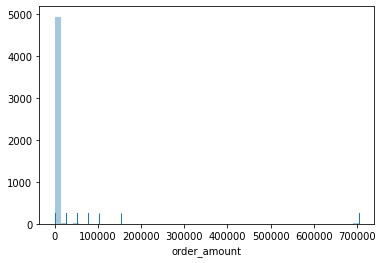

In [10]:
sns.distplot(data.order_amount, kde=False, rug=True)

Clearly, there are few exceedingly large values pushing the order_amount average high. 

Two possible reasons come to mind:

i) Some sneakers are values very highly. E.g. collectors items, signed sneakers. But these should be limited in supply and demand, therefore **unlikely reason** of average being pushed high.

ii) Some orders have multiple sneakers in them. The order_amount can be high but at the same time, unit price of each sneaker will be low. **Plausible hypothesis.**

### Hypothesis: Some orders contain multiple sneakers.

Summary statistics on total_items will give a clear indication.

In [11]:
data.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

<AxesSubplot:xlabel='total_items'>

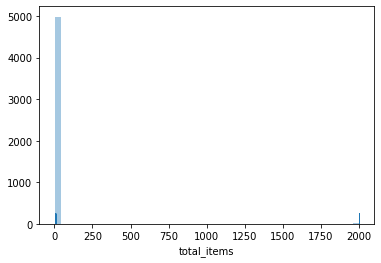

In [12]:
sns.distplot(data.total_items, kde=False, rug=True)

The median order size is 2 sneakers/order. This automatically will push the average cost of sneakers as evalauted by AOV down by 50%. At the same time, there are orders with also 2000 sneakers per order. 

## Instead of 'AOV' to evaluate average sneaker price, 'AOV/item' should the metric to be used.

### Step 3: Corrected Average (per Sneaker basis)

In [13]:
data['order_value_per_item'] = data['order_amount']/data['total_items']
data.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_value_per_item
order_id,,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [14]:
round(data.order_value_per_item.mean(),2)

387.74

### Thus, the average sneaker value is 387.74 Dollars.